# ML data for insurance 

## import libraries 

In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.3.1-bin-hadoop2'

In [2]:
import os
import findspark
import py4j
from pyspark.sql import SparkSession

from pyspark.sql.types import *
from pyspark.sql.functions import mean,countDistinct, avg,stddev, col, count, when, floor, ceil
from pyspark.sql.functions import split, col, regexp_extract, lit
import pyspark.sql.functions as F
from pyspark.sql.functions import year
from pyspark.sql.functions import month
from pyspark.sql.functions import dayofweek

from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer, OneHotEncoder, StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns#for plotting

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.sql.types import StructType

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import validation_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier


## import data 

In [3]:
insurance_ml = pd.read_csv('ml_insurancefraud.csv', index_col = False)

In [4]:
insurance_ml.head()

,Unnamed: 0,marital_status,safety_rating,college_graduate,address_change,no._of_claims,witness_present,liab(%),claim_payout,vehicle_price,...,gender_F,gender_M,living_status_Own,living_status_Rent,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,policy_report_complete,policy_report_incomplete,fraud
0,0,1.0,85,1,1,1,0.0,74,7531.0,12885.0,...,0,1,0,1,0,1,0,0,1,0
1,1,0.0,75,0,1,1,1.0,79,2966.0,29429.0,...,1,0,0,1,1,0,0,0,1,0
2,2,0.0,87,0,1,0,0.0,0,6284.0,21701.0,...,1,0,1,0,0,1,0,0,1,1
3,3,1.0,58,1,0,3,0.0,99,6170.0,13198.0,...,1,0,1,0,0,1,0,1,0,1
4,4,1.0,95,1,0,0,1.0,7,4541.0,38060.0,...,0,1,0,1,1,0,0,0,1,0


# train test split 

In [5]:
X = insurance_ml.iloc[:,1:21].values
y = insurance_ml.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

In [6]:
def shape_and_length(train_data, test_data):
    print('shape:')
    print('\n')
    print('train data: ',train_data.shape)
    print('test data: ',test_data.shape)
    print('\n')
    print('Length:')
    print('\n')
    print('Train data length: ', len(train_data))
    print('Test data length: ', len(test_data))

In [7]:
#Shape and length X data 
shape_and_length(X_train, X_test)

shape:


train data:  (14398, 20)
test data:  (3600, 20)


Length:


Train data length:  14398
Test data length:  3600


In [8]:
#Shape and length of y data 
shape_and_length(y_train, y_test)

shape:


train data:  (14398,)
test data:  (3600,)


Length:


Train data length:  14398
Test data length:  3600


(array([[1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4340e+04, 5.8000

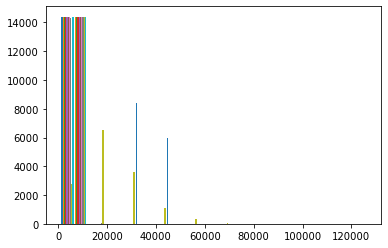

In [9]:
plt.hist(X_train)

(array([[3.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.600e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.422e+03, 1.780e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

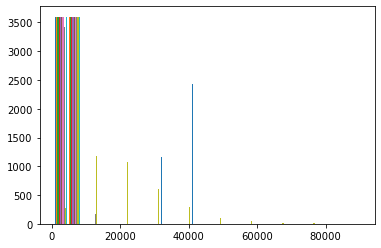

In [10]:
plt.hist(X_test)

# standardize

In [11]:
ssc = StandardScaler()

ssc.fit(X_train)
ssc.fit(X_test)

X_train = ssc.fit_transform(X_train)
X_test = ssc.fit_transform(X_test)

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 4.1390e+03, 0.0000e+00,
         1.0259e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 5.0000e+00, 1.8300e+02, 1.3710e+03, 6.9000e+03,
         5.9390e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2680e+03, 0.0000e+00,
         1.0130e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0750e+03,
         8.3230e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0117e+04,
         3.5400e+03, 6.1400e+02, 1.0400e+02, 2.3000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1079e+04,
         3.3190e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2580e+03, 6.6290e+03,
         5.5110e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000

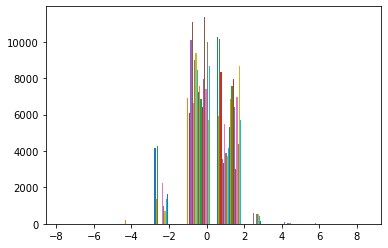

In [12]:
plt.hist(X_train)

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.030e+03, 0.000e+00,
         2.570e+03, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.300e+01, 1.000e+02, 4.680e+02, 1.640e+03,
         1.379e+03, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.146e+03, 0.000e+00,
         2.454e+03, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.533e+03, 0.000e+00,
         2.067e+03, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.533e+03,
         8.770e+02, 1.220e+02, 3.500e+01, 3.300e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.762e+03,
         8.380e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.110e+02, 1.358e+03,
         1.331e+03, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.180e+02, 1.942e+03,
         8.640e+02, 1.

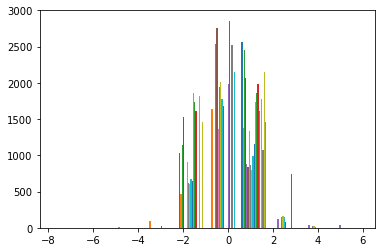

In [13]:
plt.hist(X_test)

In [14]:
#getting count of fraudulent and legitimate claims 
fraud = insurance_ml['fraud'].value_counts().reset_index()

fraud = pd.DataFrame(fraud)

fraud = fraud.rename({'index':'fraud_or_not',
                     'fraud':'reported_claims'}, axis = 1)

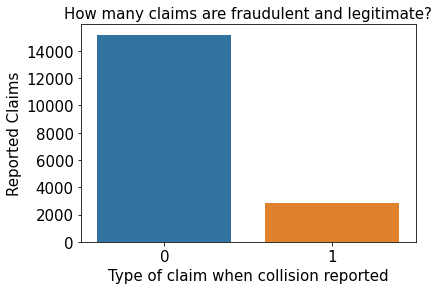

In [15]:
#plotting
sns.barplot(x = 'fraud_or_not', y = 'reported_claims', data = fraud)
plt.title('How many claims are fraudulent and legitimate?', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Type of claim when collision reported', fontsize = 15)
plt.ylabel('Reported Claims', fontsize = 15)
plt.show()

# Decision Tree classifer

In [16]:
#validation curve
depths = np.arange(1,21)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state = 45),
                                  X, y, param_name="max_depth", param_range=depths,
                                  cv=5, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

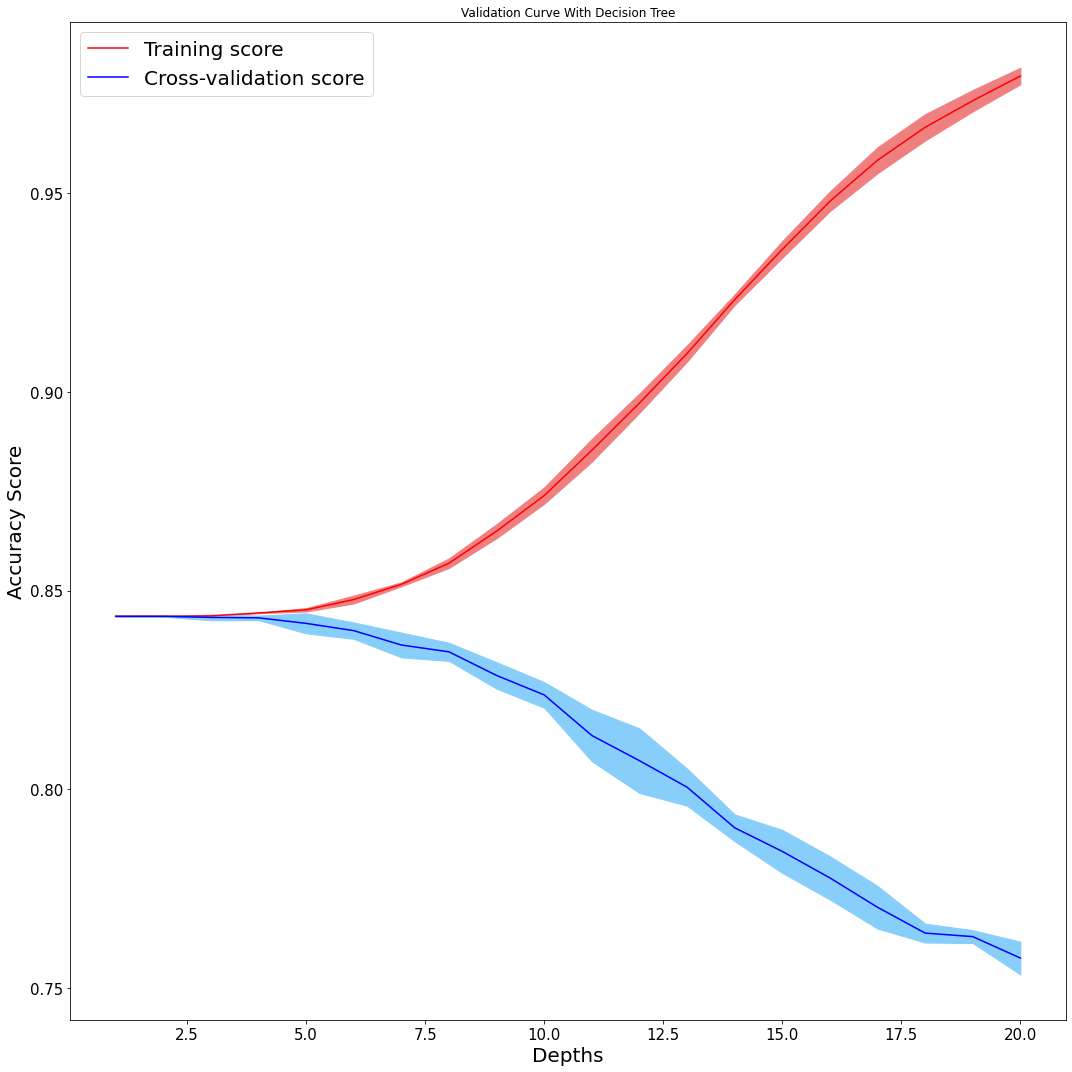

In [17]:
#plotting
plt.subplots(1, figsize=(15,15))
plt.plot(depths, train_mean, label="Training score", color="red")
plt.plot(depths, test_mean, label="Cross-validation score", color="blue")
    
plt.fill_between(depths, train_mean - train_std, train_mean + train_std, color="lightcoral")
plt.fill_between(depths, test_mean - test_std, test_mean + test_std, color="lightskyblue")
 
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Depths", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Accuracy Score", fontsize=20)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.legend(loc="upper left", fontsize = 20)
plt.show()

In [18]:
#Decision tree testing and accuracy scores 

train_accuracies = {}
test_accuracies = {}

depths = np.arange(1,21)

for depth in depths:
    dtree = DecisionTreeClassifier(max_depth = depth, random_state = 45)
    dtree.fit(X_train, y_train)
    train_accuracies[depth] = dtree.score(X_train, y_train)
    test_accuracies[depth] = dtree.score(X_test, y_test)

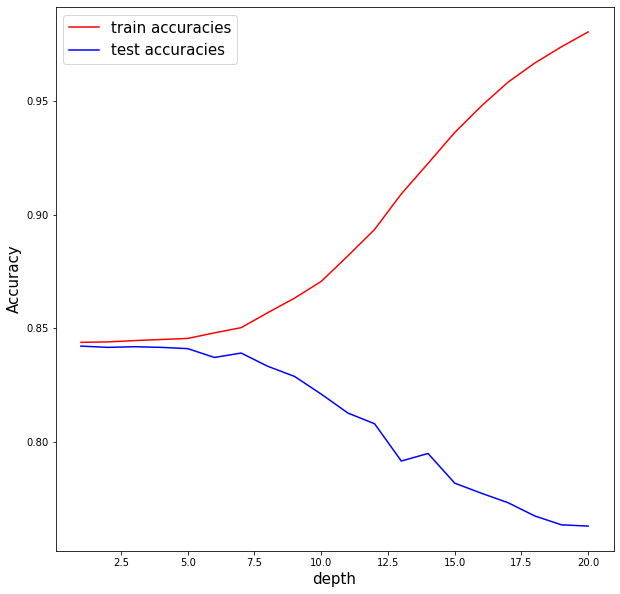

In [19]:
plt.figure(figsize = (10,10))
plt.plot(depths, train_accuracies.values(), color = 'red')
plt.plot(depths, test_accuracies.values(), color = 'blue')
plt.legend(labels = ['train accuracies', 'test accuracies'], fontsize = 15)
plt.xlabel('depth', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [20]:
params_dt = {'criterion':['gini','entropy'],
            'max_depth': [2,4,6,8,10],
            'min_samples_leaf':[1,2,3,4,5]}

grid_dt = GridSearchCV(estimator=dtree,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train,y_train)

opt_model = grid_dt.best_estimator_

y_pred = opt_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('best estimator {}'.format(opt_model))
print('best params {}'.format(grid_dt.best_params_))
print('test accuracy {}'.format(acc))


best estimator DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=45)
best params {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}
test accuracy 0.8422222222222222


# Random forest Classifier

In [21]:
#validation curve

trees = np.arange(1,11)

train_scores, test_scores = validation_curve(RandomForestClassifier(random_state = 45),
                                  X, y, param_name="n_estimators", param_range=trees,
                                  cv=5, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

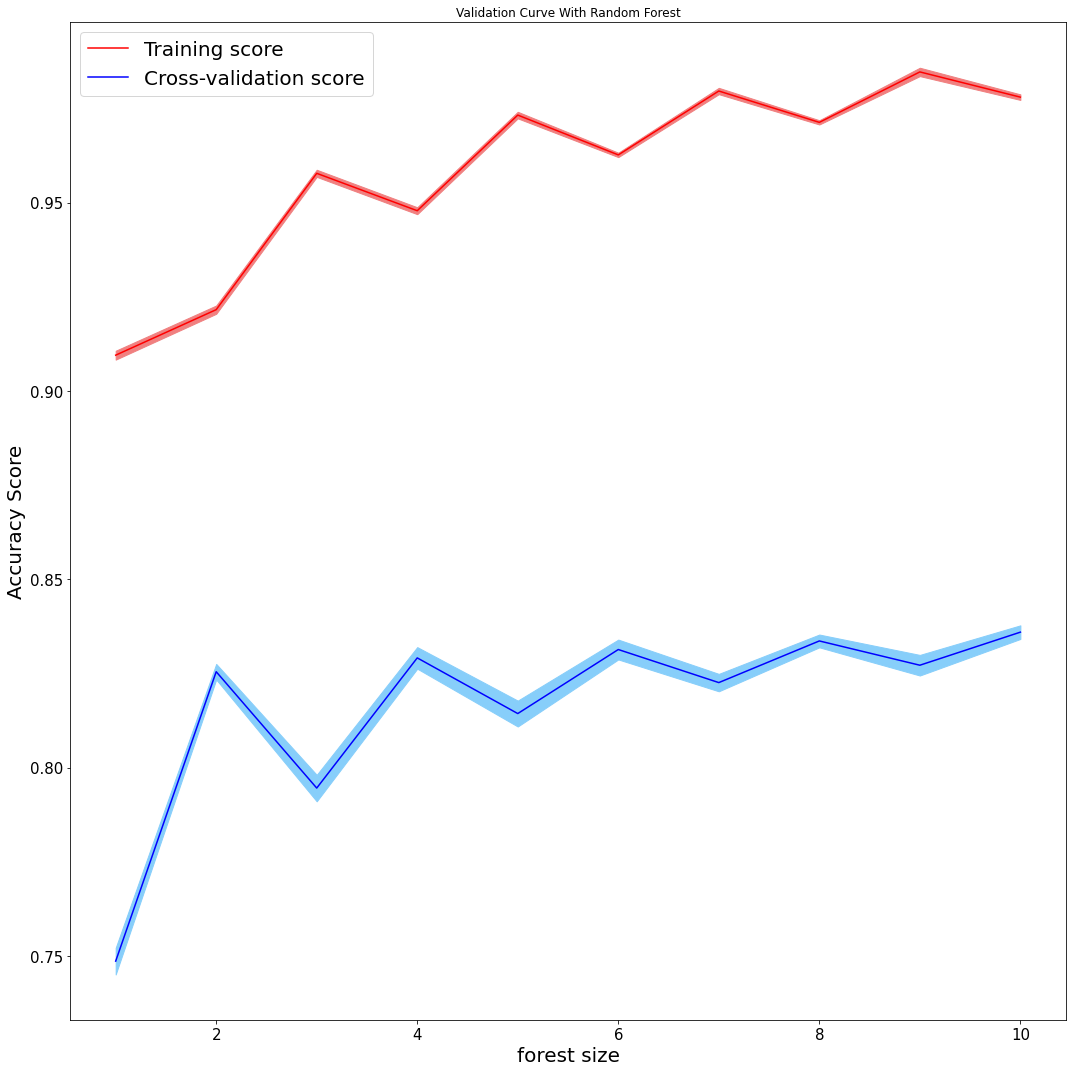

In [22]:
#plotting 
plt.subplots(1, figsize=(15,15))
plt.plot(trees, train_mean, label="Training score", color="red")
plt.plot(trees, test_mean, label="Cross-validation score", color="blue")
    
plt.fill_between(trees, train_mean - train_std, train_mean + train_std, color="lightcoral")
plt.fill_between(trees, test_mean - test_std, test_mean + test_std, color="lightskyblue")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("forest size", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Accuracy Score", fontsize=20)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.legend(loc="upper left", fontsize = 20)
plt.show()

In [23]:
#Decision tree testing and accuracy scores 

train_accuracies = {}
test_accuracies = {}

trees = range(1,20)

for tree in trees:
    rf = RandomForestClassifier(max_depth = tree, random_state = 45)
    rf.fit(X_train, y_train)
    train_accuracies[tree] = rf.score(X_train, y_train)
    test_accuracies[tree] = rf.score(X_test, y_test)

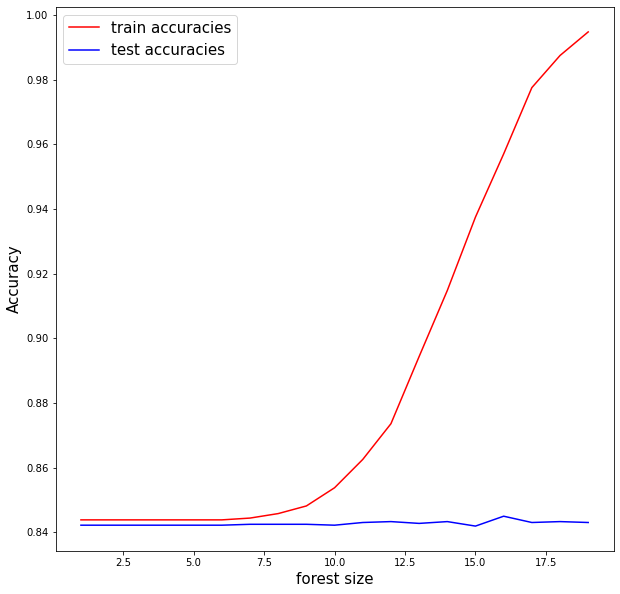

In [24]:
plt.figure(figsize = (10,10))
plt.plot(trees, train_accuracies.values(), color = 'red')
plt.plot(trees, test_accuracies.values(), color = 'blue')
plt.legend(labels = ['train accuracies', 'test accuracies'], fontsize = 15)
plt.xlabel('forest size', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [25]:
#hyperparameter tuning 
params_rf = {'criterion':['gini','entropy'],
             'n_estimators':[10,20,30],
            'max_depth': [2,4,6,8,10],
            'min_samples_leaf':[1,2,3,4,5]}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

grid_rf.fit(X_train,y_train)

opt_model = grid_rf.best_estimator_

y_pred = opt_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('best estimator {}'.format(opt_model))
print('best params {}'.format(grid_dt.best_params_))
print('test accuracy {}'.format(acc))

best estimator RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       n_estimators=30, random_state=45)
best params {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}
test accuracy 0.8416666666666667


# Under sampling 

In [26]:
under = RandomUnderSampler(sampling_strategy = 'majority')

X_under, y_under = under.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 45)

print(Counter(y_test))

Counter({0: 583, 1: 544})


(array([583.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 544.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

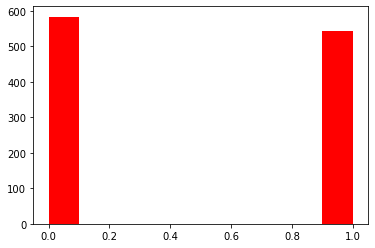

In [27]:
plt.hist(y_test, color = 'red')

## model retraining 

## decision tree

In [28]:
dtree = DecisionTreeClassifier(criterion = 'gini',
            max_depth = 4,
            min_samples_leaf= 4)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)




In [29]:
print('classification report: \n', classification_report(y_test,y_pred))
print('confusion_matrix: \n', confusion_matrix(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.64      0.57      0.61       583
           1       0.59      0.66      0.62       544

    accuracy                           0.61      1127
   macro avg       0.62      0.62      0.61      1127
weighted avg       0.62      0.61      0.61      1127

confusion_matrix: 
 [[334 249]
 [185 359]]


## random forest 

In [30]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 4, n_estimators = 30)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)



In [31]:
print('classification report: \n', classification_report(y_test,y_pred))
print('confusion_matrix: \n', confusion_matrix(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.66      0.60      0.63       583
           1       0.61      0.67      0.64       544

    accuracy                           0.63      1127
   macro avg       0.63      0.63      0.63      1127
weighted avg       0.63      0.63      0.63      1127

confusion_matrix: 
 [[347 236]
 [180 364]]


# oversampling 

In [32]:
over = RandomOverSampler(sampling_strategy = 'minority')

X_over, y_over = over.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 45)

print(Counter(y_test))

Counter({0: 3052, 1: 3021})


(array([3052.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3021.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

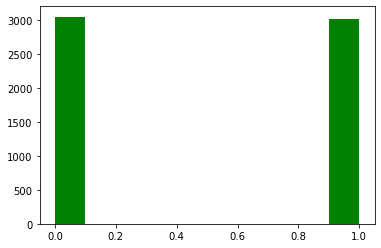

In [33]:
plt.hist(y_test, color = 'green')

## decision tree

In [34]:
dtree = DecisionTreeClassifier(criterion = 'gini',
            max_depth = 4,
            min_samples_leaf= 4)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)


In [35]:
print('classification report: \n', classification_report(y_test,y_pred))
print('confusion_matrix: \n', confusion_matrix(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.65      0.58      0.61      3052
           1       0.61      0.68      0.65      3021

    accuracy                           0.63      6073
   macro avg       0.63      0.63      0.63      6073
weighted avg       0.63      0.63      0.63      6073

confusion_matrix: 
 [[1756 1296]
 [ 953 2068]]


## random forest

In [36]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 4, n_estimators = 30)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [37]:
print('classification report: \n', classification_report(y_test,y_pred))
print('confusion_matrix: \n', confusion_matrix(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.68      0.55      0.61      3052
           1       0.62      0.74      0.67      3021

    accuracy                           0.64      6073
   macro avg       0.65      0.64      0.64      6073
weighted avg       0.65      0.64      0.64      6073

confusion_matrix: 
 [[1665 1387]
 [ 787 2234]]
